# Feature Selection using Filters
### Feature Scoring - two methods  
1. Chi square statistic
2. Information Gain

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 

In [2]:
seg_data = pd.read_csv('segmentation-all.csv')
print(seg_data.shape)
seg_data.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [3]:
seg_data['Class'].value_counts()

GRASS        330
CEMENT       330
SKY          330
WINDOW       330
BRICKFACE    330
PATH         330
FOLIAGE      330
Name: Class, dtype: int64

Load the data, scale it and divide into train and test sets.  
The filters are *trained* using the training data and then a classifier is trained on the feature subset and tested on the test set. 

In [4]:
y = seg_data.pop('Class').values
X_raw = seg_data.values

X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y, 
                                                       random_state=1, test_size=1/2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)

feature_names = seg_data.columns
X_train.shape, X_test.shape

((1155, 19), (1155, 19))

### Feature Scores  
Determine the chi-squared and information gain scores for all features using the training set.   
**Note:** The mutual information score returned by `mutual_info_classif` is effectively an information gain score.  

In [5]:
chi2_score, pval = chi2(X_train, y_train)
chi2_score = np.nan_to_num(chi2_score)
chi2_score
# The chi square scores for the features

array([ 14.99569813, 114.86161054,   0.        ,  13.47060858,
        27.33137409,  14.52455789,  20.00650221,  17.74732567,
        15.4768292 , 293.4360061 , 290.96380025, 303.47783064,
       290.11739498,  54.25395182, 111.01924229,  92.91780859,
       287.66891553,  81.64654774, 268.86221356])

In [6]:
i_scores = mutual_info_classif(X_train,y_train)
i_scores
# The i-gain scores for the features

array([0.12564121, 0.95086835, 0.        , 0.        , 0.03434048,
       0.4961291 , 0.3168763 , 0.46190501, 0.3611665 , 1.16063857,
       1.2099681 , 1.10885309, 1.13481537, 0.77131547, 0.91339938,
       0.95851425, 1.13550032, 0.92892621, 1.13670514])

Store the scores in a dataframe indexed by the feature names.

In [7]:
df=pd.DataFrame({'Mutual Info.':i_scores,'Chi Square':chi2_score,'Feature':feature_names})
df.set_index('Feature', inplace = True)
df.sort_values('Mutual Info.', inplace = True, ascending = False)
df

,Mutual Info.,Chi Square
Feature,,
RAWRED-MEAN,1.209968,290.963800
INTENSITY-MEAN,1.160639,293.436006
HUE-MEAN,1.136705,268.862214
VALUE-MEAN,1.135500,287.668916
RAWGREEN-MEAN,1.134815,290.117395
RAWBLUE-MEAN,1.108853,303.477831
EXGREEN-MEAN,0.958514,92.917809
REGION-CENTROID-ROW,0.950868,114.861611
SATURATION-MEAN,0.928926,81.646548


### Plotting the Filter scores
We see that the two scores are fairly well correlated.  
The Spearman correlation is 0.89.

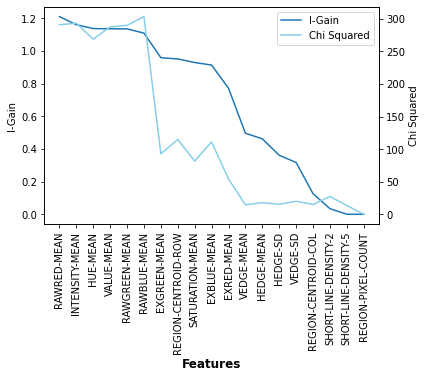

In [8]:
fig, ax = plt.subplots()
rr = range(0,len(feature_names))
ax2 = ax.twinx()
ax.plot(df.index, df["Mutual Info."], label='I-Gain')
ax2.plot(df.index, df["Chi Square"], color='skyblue', label='Chi Squared')
ax.set_xticks(rr)

ax.set_xticklabels(list(df.index), rotation = 90)
ax.set_xlabel('Features', fontsize=12, fontweight='bold')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('Chi Squared')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

In [9]:
from scipy import stats
stats.spearmanr(chi2_score, i_scores)

SpearmanrResult(correlation=0.9065380425140167, pvalue=8.924692961871377e-08)

## Feature Selection
Compare  
- Baseline: all features
- Top three, I-Gain and Chi-Square
- Top six, I-Gain and Chi-Square
- Top half (12), I-Gain and Chi-Square

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

### Baseline Classifier

In [11]:
model = KNeighborsClassifier(n_neighbors=3)
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_pred,y_test)
acc

0.9532467532467532

In [12]:
n_features = X_train.shape[1]
n_features

19

In [13]:
filters = [mutual_info_classif, chi2]
k_options = [n_features, 3, 6, 10, 15]
filt_scores = {}
chi_scores = {}
i_gain_scores = {}

for the_filter in filters:
    accs = []
    for k_val in k_options:
        FS_trans = SelectKBest(the_filter, 
                           k=k_val).fit(X_train, y_train)
        X_tR_new = FS_trans.transform(X_train)
        X_tS_new = FS_trans.transform(X_test)

        model.fit(X_tR_new, y_train)

        y_tS_pred = model.predict(X_tS_new)
        
        acc = accuracy_score(y_test, y_tS_pred)
        accs.append(acc)
        print(the_filter, k_val, acc)
    filt_scores[the_filter.__name__] = accs


<function mutual_info_classif at 0x7fcf6cc8ee60> 19 0.9532467532467532
<function mutual_info_classif at 0x7fcf6cc8ee60> 3 0.8632034632034632
<function mutual_info_classif at 0x7fcf6cc8ee60> 6 0.8796536796536797
<function mutual_info_classif at 0x7fcf6cc8ee60> 10 0.9558441558441558
<function mutual_info_classif at 0x7fcf6cc8ee60> 15 0.9558441558441558
<function chi2 at 0x7fcf6d364290> 19 0.9532467532467532
<function chi2 at 0x7fcf6d364290> 3 0.8406926406926407
<function chi2 at 0x7fcf6d364290> 6 0.8796536796536797
<function chi2 at 0x7fcf6d364290> 10 0.9558441558441558
<function chi2 at 0x7fcf6d364290> 15 0.9497835497835497


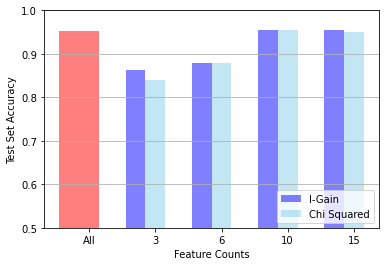

In [14]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline 

fig, ax = plt.subplots()
width = 0.3
sb = 'skyblue'

options = ['All'] + k_options[1:]
ig = filt_scores['mutual_info_classif']
ch = filt_scores['chi2']

y_pos = np.arange(len(options))

p1 = ax.bar(y_pos-width, ig, width, align='center', 
            color=['red', 'blue', 'blue','blue','blue'],alpha=0.5)
p2 = ax.bar(y_pos, ch, width, align='center', 
            color=['red', sb, sb, sb, sb],alpha=0.5)

ax.legend((p1[1], p2[1]), ('I-Gain', 'Chi Squared'),loc='lower right')
ax.set_ylim([0.5, 1])
plt.grid(axis = 'y')
plt.yticks(np.arange(0.5,1.05,0.1))

plt.xticks(y_pos, options)
plt.ylabel('Test Set Accuracy')
plt.xlabel('Feature Counts')
plt.show()

## Hybrid Filter Wrapper Strategy
We rank the features using information gain (well mutual information) and select the _k_ best to build a classifier.  
We iterate through increasing values of *k*.  
`SelectKBest` is a _transform_ that transforms the training data.


In [15]:
cv_acc_scores = []
tst_acc_scores = []
best_acc = 0
best_k = 0
for kk in range(1, X_train.shape[1]+1):
    FS_trans = SelectKBest(mutual_info_classif, 
                           k=kk).fit(X_train, y_train)
    X_tR_new = FS_trans.transform(X_train)
    X_tS_new = FS_trans.transform(X_test)
    cv_acc = cross_val_score(model, X_tR_new, y_train, cv=8)
    cv_acc_scores.append(cv_acc.mean())
    y_pred_temp = model.fit(X_tR_new, y_train).predict(X_tS_new)
    tst_acc_scores.append(accuracy_score(y_pred_temp, y_test))
    if cv_acc.mean() > best_acc:
        best_acc = cv_acc.mean()
        best_k = kk
df['Training Acc.'] = cv_acc_scores
df['Test Acc.'] = tst_acc_scores

print(best_k, best_acc)
df.head(15)

9 0.9506166187739464


,Mutual Info.,Chi Square,Training Acc.,Test Acc.
Feature,,,,
RAWRED-MEAN,1.209968,290.963800,0.634567,0.613853
INTENSITY-MEAN,1.160639,293.436006,0.771360,0.777489
HUE-MEAN,1.136705,268.862214,0.813805,0.811255
VALUE-MEAN,1.135500,287.668916,0.861428,0.852814
RAWGREEN-MEAN,1.134815,290.117395,0.867499,0.863203
RAWBLUE-MEAN,1.108853,303.477831,0.863159,0.879654
EXGREEN-MEAN,0.958514,92.917809,0.866625,0.891775
REGION-CENTROID-ROW,0.950868,114.861611,0.943696,0.953247
SATURATION-MEAN,0.928926,81.646548,0.950617,0.955844


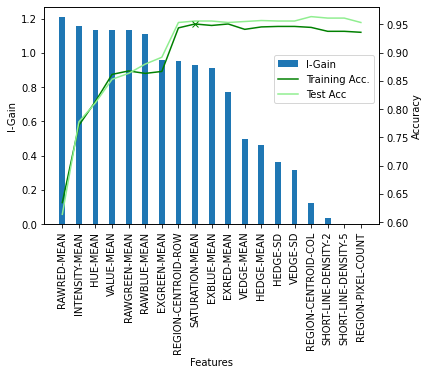

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

n = len(df.index)
rr = range(0,n)
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(df.index, df["Mutual Info."], label='I-Gain',width=.35)

ax2.plot(df.index, df["Training Acc."], color='green', label='Training Acc.')
ax2.plot(df.index, df["Test Acc."], color='lightgreen', label='Test Acc')
ax.set_xticks(rr)
ax2.plot(best_k-1,best_acc,'gx') 
ax.set_xticklabels(list(df.index), rotation = 90)
ax.set_xlabel('Features')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('Accuracy')
fig.legend(loc="upper right", bbox_to_anchor=(1,0.8), bbox_transform=ax.transAxes)
plt.show()